# importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import re
import string

In [3]:
pip install worldcloud 


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement worldcloud (from versions: none)
ERROR: No matching distribution found for worldcloud


In [4]:
from wordcloud import WordCloud

# loading dataset

In [5]:
df = pd.read_csv(r"C:\Users\dell\Desktop\movie_review.csv")

In [6]:
df

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos
...,...,...,...,...,...,...
64715,9,cv999,14636,20,that lack of inspiration can be traced back to...,neg
64716,9,cv999,14636,21,like too many of the skits on the current inca...,neg
64717,9,cv999,14636,22,"after watching one of the "" roxbury "" skits on...",neg
64718,9,cv999,14636,23,"bump unsuspecting women , and . . . that's all .",neg


In [7]:
df.drop(['fold_id','cv_tag','html_id','sent_id'],axis=1,inplace=True)

In [8]:
df.head(10)

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
5,if you can get past the whole comic book thing...,pos
6,getting the hughes brothers to direct this see...,pos
7,"the ghetto in question is , of course , whitec...",pos
8,"it's a filthy , sooty place where the whores (...",pos
9,"when the first stiff turns up , copper peter g...",pos


In [9]:
df.isna().sum()

text    0
tag     0
dtype: int64

In [10]:
df.dtypes

text    object
tag     object
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df.nunique()

text    63652
tag         2
dtype: int64

In [13]:
df['tag']=le.fit_transform(df['tag'])

In [14]:
df.head()

,text,tag
0,films adapted from comic books have had plenty...,1
1,"for starters , it was created by alan moore ( ...",1
2,to say moore and campbell thoroughly researche...,1
3,"the book ( or "" graphic novel , "" if you will ...",1
4,"in other words , don't dismiss this film becau...",1


In [15]:
df = df.sample(frac=1)

In [16]:
df.head()

,text,tag
35509,"he has come back to town to see her , and sudd...",0
8777,can you see it ?,1
39572,the rich legacy of cinema has left us with cer...,0
49411,the best scene is when nick nolte's character ...,0
6540,alien focused on one alien in particular which...,1


In [17]:
df.tail()

,text,tag
15216,"that concept , although many purists doubt its...",1
44411,even though annie wasn't exactly a rocket scie...,0
14200,"but despite of that , it is certainly an intel...",1
34035,"the stripping bare , literally and figurativel...",0
60307,it's obvious that the film maker is trying to ...,0


In [18]:
df.reset_index(inplace=True)


In [20]:
df.drop(['index'],axis=1,inplace=True)

In [21]:
df.head()

,text,tag
0,"he has come back to town to see her , and sudd...",0
1,can you see it ?,1
2,the rich legacy of cinema has left us with cer...,0
3,the best scene is when nick nolte's character ...,0
4,alien focused on one alien in particular which...,1


In [22]:
df.shape

(64720, 2)

In [23]:
df.describe()

,tag
count,64720.000000
mean,0.508915
std,0.499924
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# preprocessing the data

In [24]:
def wordopt(text): 
    #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [25]:
df['text'] = df['text'].apply(wordopt)

In [26]:
df.head()

,text,tag
0,he has come back to town to see her and sudd...,0
1,can you see it,1
2,the rich legacy of cinema has left us with cer...,0
3,the best scene is when nick nolte s character ...,0
4,alien focused on one alien in particular which...,1


# data visulaization

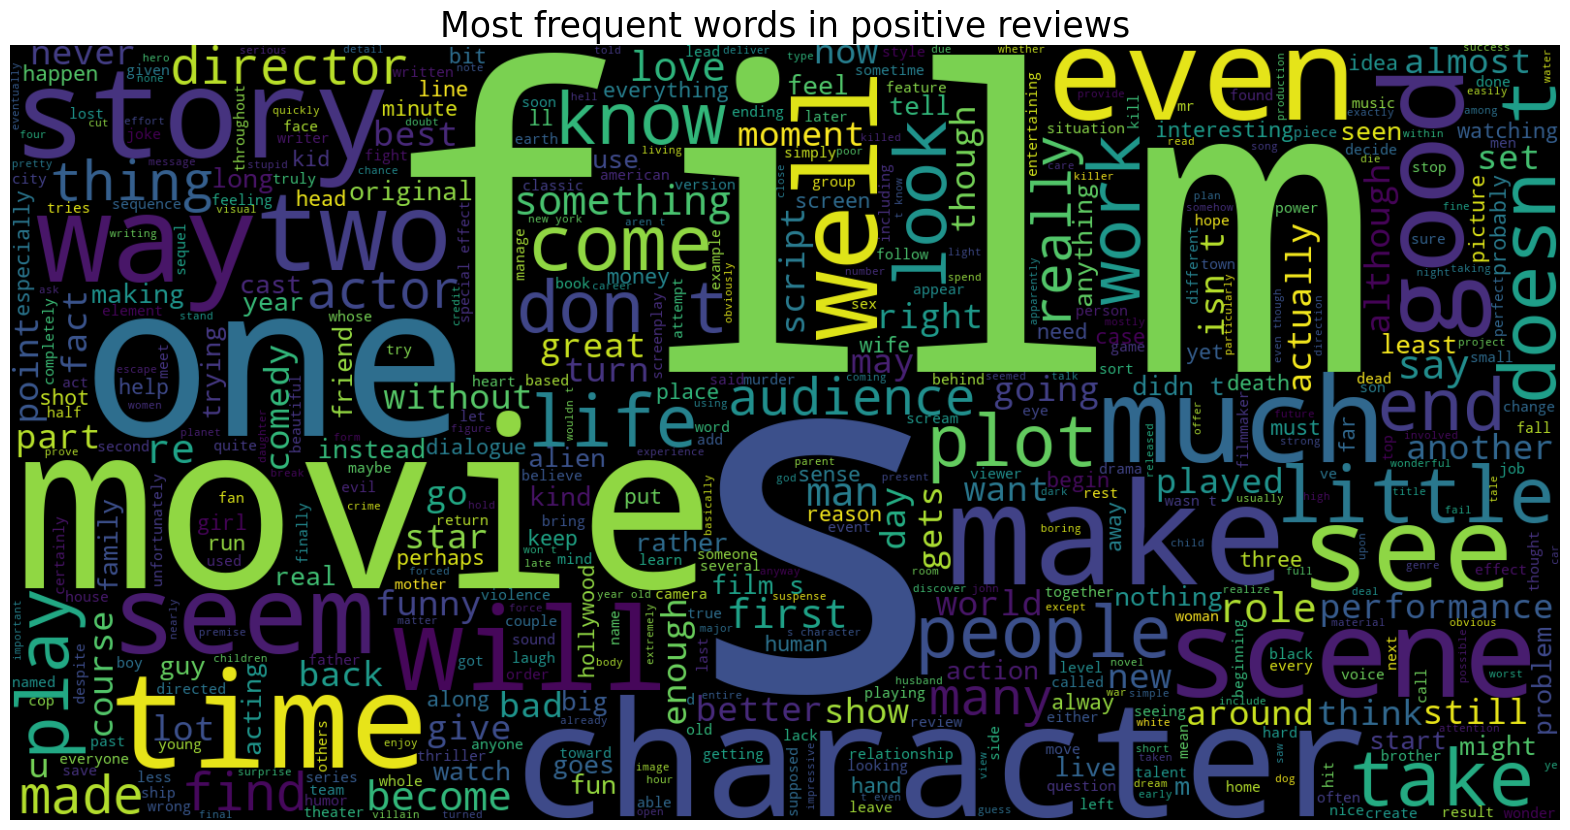

In [27]:
text=' '.join([word for word in df['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=25)
plt.show()

# DAta splitting

In [28]:
df.head()

,text,tag
0,he has come back to town to see her and sudd...,0
1,can you see it,1
2,the rich legacy of cinema has left us with cer...,0
3,the best scene is when nick nolte s character ...,0
4,alien focused on one alien in particular which...,1


In [29]:
x = df['text']
y = df['tag']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [31]:
print(x_train)
print(x_test)


53669    playing the young francie brady is newcomer ea...
45336      holy man   also tries to present a story of ...
62100    fortunately   he gets the plotting pretty well...
55846    goldblum is actually quite good   but it s har...
62734    richard attenborough has a   literally   walk ...
                               ...                        
62570    i have seen many movies far less profound   le...
38158    to its credit   there are a few scenes that co...
860      not that any of this is for a second scary or ...
15795    the music is blaring   the floors moving   the...
56422    she must then join together with her model fri...
Name: text, Length: 48540, dtype: object
58154    their three female counterparts fare noticeabl...
33401    meanwhile   most shots take place at night   i...
44182    i have a soft spot for cheesy monster movies  ...
46480    surprised me   was that the camera work   for ...
41584                                         notting hill
               

In [32]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(48540,) (16180,) (48540,) (16180,)


# NLP

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [34]:
vectorization = TfidfVectorizer()

In [35]:
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [36]:
xv_test.shape

(16180, 35021)

In [37]:
xv_train.shape

(48540, 35021)

# model building

# logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [39]:
LR.fit(xv_train,y_train)


LogisticRegression()

In [40]:
y_predLR = LR.predict(xv_test)

In [41]:
print("the acc score is :", accuracy_score(y_test,y_predLR))

the acc score is : 0.6958590852904821


In [42]:
LR_acc=LR.score(xv_test,y_test)
LR_acc

0.6958590852904821

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [45]:
y_predDT = DT.predict(xv_test)

In [46]:
print(" the acc score is :", accuracy_score(y_test,y_predDT))

 the acc score is : 0.5504326328800989


# RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestClassifier


In [48]:
RF = RandomForestClassifier()
RF.fit(xv_train,y_train)

RandomForestClassifier()

In [49]:
y_predRF = RF.predict(xv_test)

In [50]:
print("the acc score is:", accuracy_score(y_test,y_predRF))

the acc score is: 0.6343016069221261


# naive bayes

In [51]:
# Gaussian 
from sklearn.naive_bayes import GaussianNB

In [52]:
# GNB = GaussianNB()
# GNB.fit(xv_train,y_train)


In [53]:
# multinomial
from sklearn.naive_bayes import MultinomialNB


In [54]:
MNB = MultinomialNB()
MNB.fit(xv_train,y_train)

MultinomialNB()

In [55]:
y_predMNB = MNB.predict(xv_test)

In [56]:
print("the acc score is: ", accuracy_score(y_test,y_predMNB))

the acc score is:  0.7122991347342398


In [57]:
# bernoulli
from sklearn.naive_bayes import BernoulliNB


In [58]:
BNB = BernoulliNB()
BNB.fit(xv_train,y_train)

BernoulliNB()

In [59]:
y_predBNB = BNB.predict(xv_test)

In [60]:
print("the acc score is:", accuracy_score(y_test,y_predBNB))

the acc score is: 0.7072929542645241


# BOOSTING

In [61]:
df.head()

,text,tag
0,he has come back to town to see her and sudd...,0
1,can you see it,1
2,the rich legacy of cinema has left us with cer...,0
3,the best scene is when nick nolte s character ...,0
4,alien focused on one alien in particular which...,1


In [62]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier

In [63]:
ABC = AdaBoostClassifier()
ABC.fit(xv_train,y_train)

AdaBoostClassifier()

In [64]:
y_predABC = ABC.predict(xv_test)

In [65]:
print("the accuracy score is :", accuracy_score(y_test,y_predABC))

the accuracy score is : 0.5838071693448702


In [66]:
# gradientboosting 
from sklearn.ensemble import GradientBoostingClassifier


In [67]:
GBC = GradientBoostingClassifier()

In [68]:
GBC.fit(xv_train,y_train)

GradientBoostingClassifier()

In [69]:
y_predGBC = GBC.predict(xv_test)

In [70]:
print("the acc score is :", accuracy_score(y_test,y_predGBC))

the acc score is : 0.5992583436341162


In [71]:
!pip install xgboost

In [73]:
from xgboost import XGBClassifier
XGB = XGBClassifier()

In [74]:
XGB.fit(xv_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
y_predXGB = XGB.predict(xv_test)

In [77]:
print("the acc score is :", accuracy_score(y_test,y_predXGB))

the acc score is : 0.6241038318912238


# SVM

In [78]:
from sklearn.svm import SVC

In [79]:
SVM = SVC(kernel='rbf')

In [80]:
SVM.fit(xv_train,y_train)

SVC()

In [81]:
y_predSVM = SVM.predict(xv_test)

In [82]:
print(" the acc score is:", accuracy_score(y_test,y_predSVM))

 the acc score is: 0.7087144622991347


# PERFORMANCE ANALYSIS

In [84]:
print("the acc score of LogesticRegression is:" ,accuracy_score(y_test,y_predLR))
print("the acc score of Decision tree model is:", accuracy_score(y_test,y_predDT))
print("the acc score of RandomForest model is:" ,accuracy_score(y_test,y_predRF))
print("the acc score of MULTINOMIAL NAYEBAYES MODEL is:", accuracy_score(y_test,y_predMNB))
print("the acc score of BERNOULLI NAYE BAYES MODEL is:", accuracy_score(y_test,y_predMNB))
print("the acc score of ADABOOST MODEL is:", accuracy_score(y_test,y_predABC))
print("the acc score of GRADIENTBOOSTING MODEL is:" ,accuracy_score(y_test,y_predGBC))
print("the acc score of XGBOOST MODEL is:" ,accuracy_score(y_test,y_predXGB))
print("the acc score of SVM model is :", accuracy_score(y_test,y_predSVM))


the acc score of LogesticRegression is: 0.6958590852904821
the acc score of Decision tree model is: 0.5504326328800989
the acc score of RandomForest model is: 0.6343016069221261
the acc score of MULTINOMIAL NAYEBAYES MODEL is: 0.7122991347342398
the acc score of BERNOULLI NAYE BAYES MODEL is: 0.7122991347342398
the acc score of ADABOOST MODEL is: 0.5838071693448702
the acc score of GRADIENTBOOSTING MODEL is: 0.5992583436341162
the acc score of XGBOOST MODEL is: 0.6241038318912238
the acc score of SVM model is : 0.7087144622991347


In [86]:
models = {
    "LogesticRegression": y_predLR,
    "Decision tree model": y_predDT,
    "RandomForest model": y_predRF,
    "MULTINOMIAL NAYEBAYES MODEL": y_predMNB,
    "BERNOULLI NAYE BAYES MODEL": y_predMNB,
    "ADABOOST MODEL": y_predABC,
    "GRADIENTBOOSTING MODEL": y_predGBC,
    "XGBOOST MODEL": y_predXGB,
    "SVM MODEL": y_predSVM
}

for model, prediction in models.items():
    print(f"the acc score of {model} is:", round(accuracy_score(y_test, prediction)*100,2))


the acc score of LogesticRegression is: 69.59
the acc score of Decision tree model is: 55.04
the acc score of RandomForest model is: 63.43
the acc score of MULTINOMIAL NAYEBAYES MODEL is: 71.23
the acc score of BERNOULLI NAYE BAYES MODEL is: 71.23
the acc score of ADABOOST MODEL is: 58.38
the acc score of GRADIENTBOOSTING MODEL is: 59.93
the acc score of XGBOOST MODEL is: 62.41
the acc score of SVM MODEL is: 70.87


# conclusion

according to above models, the multinomial and bernoulli shows the highest accuracy with 71.23%

In [89]:
df.head()

,text,tag
0,he has come back to town to see her and sudd...,0
1,can you see it,1
2,the rich legacy of cinema has left us with cer...,0
3,the best scene is when nick nolte s character ...,0
4,alien focused on one alien in particular which...,1


In [92]:
df.tail()

,text,tag
64715,that concept although many purists doubt its...,1
64716,even though annie wasn t exactly a rocket scie...,0
64717,but despite of that it is certainly an intel...,1
64718,the stripping bare literally and figurativel...,0
64719,it s obvious that the film maker is trying to ...,0


In [93]:
 # example 
example = ["that concept although many purists doubt "]
# vectorize it 
example_vectorized = vectorization.transform(example)
# 
result = MNB.predict(example_vectorized)
#
if (result==0):
    print("positive review")
else:
    print("negative review")

negative review


In [99]:
example = ["alien focused on one alien in particular"]
example_vectorized = vectorization.transform(example)

result = MNB.predict(example_vectorized)
if (result==1):
    print("positive review")
else:
    print("negative review")

positive review


In [100]:
df.to_csv("movies_review_processed")